<a href="https://colab.research.google.com/github/faiza224/Working-with-Pandas/blob/main/8June_Code_Gen_%26_Report_summarization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import pandas as pd
import matplotlib.pyplot as plt


In [47]:
df = pd.read_csv('sales_data.csv')
df.head()

,Date,Region,Category,Sales
0,2023-01-01,North,Technology,1150.05
1,2023-01-02,South,Furniture,1325.28
2,2023-01-03,East,Office Supplies,1032.96
3,2023-01-04,West,Technology,1189.13
4,2023-01-05,North,Technology,1418.37


In [5]:
df.dtypes

,0
Date,object
Region,object
Category,object
Sales,float64


In [6]:
df.describe()

,Sales
count,100.000000
mean,1246.417300
std,143.735719
min,1003.230000
25%,1138.747500
50%,1265.380000
75%,1369.605000
max,1488.590000


In [7]:
df.index

RangeIndex(start=0, stop=100, step=1)

In [8]:
df.shape

(100, 4)

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.isna().sum()

,0
Date,0
Region,0
Category,0
Sales,0


GROUPBYN AGGREGATION

In [11]:
df.groupby('Category')['Sales'].sum()

,Sales
Category,
Furniture,30930.75
Office Supplies,31362.59
Technology,62348.39


In [12]:
df.groupby('Category')['Sales'].agg(['sum', 'mean', 'max', 'min'])

,sum,mean,max,min
Category,,,,
Furniture,30930.75,1237.2300,1447.04,1003.23
Office Supplies,31362.59,1254.5036,1486.23,1003.83
Technology,62348.39,1246.9678,1488.59,1011.83


Another Method of Groupby Filteration using variable. It is useful when we do aggregation in groups.GroupBy splits the data into groups first, which is more expensive if you only want one filter.
The result of by_region.get_group('East') is similar to filtering, but:

GroupBy keeps internal group structure

You can apply aggregation (mean, sum, etc.) easily

by_region['Sales'].get_group('East').mean() computes statistics on a group, not on the full dataframe.

In [13]:
by_region = df.groupby(by = "Region")

In [14]:
#To Check output , we will use getgroup() and insert the values which are in the column/key

by_region.get_group('East')   # column is Region and East, West, North and South
# are the the column values here- we have filtered only East region

,Date,Region,Category,Sales
2,2023-01-03,East,Office Supplies,1032.96
6,2023-01-07,East,Office Supplies,1252.33
10,2023-01-11,East,Office Supplies,1379.35
14,2023-01-15,East,Office Supplies,1335.66
18,2023-01-19,East,Office Supplies,1406.35
22,2023-01-23,East,Office Supplies,1379.66
26,2023-01-27,East,Office Supplies,1400.45
30,2023-01-31,East,Office Supplies,1025.02
34,2023-02-04,East,Office Supplies,1456.00
38,2023-02-08,East,Office Supplies,1434.79


To Check The Mean

In [15]:
by_region['Sales'].mean()

,Sales
Region,
East,1254.5036
North,1233.1488
South,1237.2300
West,1260.7868


In [16]:
by_region['Sales'].get_group('East').mean()

np.float64(1254.5036)

# ON THE BASIS OF TWO GROUPS

In [17]:
by_region_category = df.groupby(['Region', 'Category']) # passing list inside the function when filter columns

In [18]:
by_region_category.get_group(('South', 'Furniture')) #use tuple when passing column values inside the function to get output

,Date,Region,Category,Sales
1,2023-01-02,South,Furniture,1325.28
5,2023-01-06,South,Furniture,1426.93
9,2023-01-10,South,Furniture,1238.46
13,2023-01-14,South,Furniture,1203.31
17,2023-01-18,South,Furniture,1056.54
21,2023-01-22,South,Furniture,1269.30
25,2023-01-26,South,Furniture,1290.04
29,2023-01-30,South,Furniture,1447.04
33,2023-02-03,South,Furniture,1369.35
37,2023-02-07,South,Furniture,1285.16


THE MORE SIMPLER WAY TO FILTERATION ,
Dynamic filter (from dict) , Loop through items

In [19]:
# first make a condition
df['Region'] == 'East'



,Region
0,False
1,False
2,True
3,False
4,False
...,...
95,False
96,False
97,False
98,True


In [20]:
# now put inside a data frame
df[df['Region'] == 'East']

,Date,Region,Category,Sales
2,2023-01-03,East,Office Supplies,1032.96
6,2023-01-07,East,Office Supplies,1252.33
10,2023-01-11,East,Office Supplies,1379.35
14,2023-01-15,East,Office Supplies,1335.66
18,2023-01-19,East,Office Supplies,1406.35
22,2023-01-23,East,Office Supplies,1379.66
26,2023-01-27,East,Office Supplies,1400.45
30,2023-01-31,East,Office Supplies,1025.02
34,2023-02-04,East,Office Supplies,1456.00
38,2023-02-08,East,Office Supplies,1434.79


#Filtering With Multiple Conditions
General Pattern

df[(condition1) & (condition2) & ...]

In [22]:
df_filtered = df[(df['Region'] == 'East') & (df['Category'] == 'Furniture')]

# 2.  Multiple Conditions (Dictionary Method)

# Dynamic Code Generation for Filtering

In [23]:
filter = {
    'Region': 'West',
    'Category': 'Technologhy'
}
# as we do not want to change original DF. Therefore, we made a copy of df
newdf = df.copy()
for key, value in filter.items():
    newdf = newdf[newdf[key]== value]

    print("filtered Data: ")
    print(newdf.to_string()) # to_string() will show full table , we can also use df.head()
    # for first five rows

filtered Data: 
          Date Region    Category    Sales
3   2023-01-04   West  Technology  1189.13
7   2023-01-08   West  Technology  1328.68
11  2023-01-12   West  Technology  1488.59
15  2023-01-16   West  Technology  1466.43
19  2023-01-20   West  Technology  1047.38
23  2023-01-24   West  Technology  1278.01
27  2023-01-28   West  Technology  1130.99
31  2023-02-01   West  Technology  1097.86
35  2023-02-05   West  Technology  1130.24
39  2023-02-09   West  Technology  1282.82
43  2023-02-13   West  Technology  1312.61
47  2023-02-17   West  Technology  1252.79
51  2023-02-21   West  Technology  1208.04
55  2023-02-25   West  Technology  1385.75
59  2023-03-01   West  Technology  1241.51
63  2023-03-05   West  Technology  1371.30
67  2023-03-09   West  Technology  1188.28
71  2023-03-13   West  Technology  1467.57
75  2023-03-17   West  Technology  1229.52
79  2023-03-21   West  Technology  1385.46
83  2023-03-25   West  Technology  1037.25
87  2023-03-29   West  Technology  132

# Exporting Reports

## To CSV

In [24]:
df_filtered.to_csv('filtered_data.csv', index = False)
# index= false means fist column will not be an index

# To Excel

In [42]:
df_filtered.to_excel('filtered_data.xlsx', index = False)

# To Text

In [36]:
with open('summary.txt', "w")  as file:
  file.write("Sales Summary\n")
  file.write(str(df.describe()))


# Report Template with Python String Formatting

In [40]:
summary = f"""
Sales Suumary Report
---------------------
Total_Sales: {df['Sales'].sum(): .2f}
Average_Sales:{df['Sales'].mean(): .2f}
Highest_Sales:{df['Sales'].max(): .2f}
Lowest_Sales: {df['Sales'].min(): .2f}
"""

with open('text_report.txt', "w") as f:
  f.write(summary)

print(summary)




Sales Suumary Report
---------------------
Total_Sales:  124641.73
Average_Sales: 1246.42
Highest_Sales: 1488.59
Lowest_Sales:  1003.23



In [48]:
#To check the Type of Date column
df.dtypes

,0
Date,object
Region,object
Category,object
Sales,float64


As we can see it is an Object Type, To convert the type of Date into Date Type from Object type





In [49]:
df['Date'] =pd.to_datetime(df['Date'])  # convert the data type of Date column from category to datetime
df.dtypes

,0
Date,datetime64[ns]
Region,object
Category,object
Sales,float64


In [50]:
# STEP 2: Make a new column Month for visualization as we do not have a Month column, required for visualization on monthly basis
df['Month'] = df['Date'].dt.month # dt.month shows number of months
df

,Date,Region,Category,Sales,Month
0,2023-01-01,North,Technology,1150.05,1
1,2023-01-02,South,Furniture,1325.28,1
2,2023-01-03,East,Office Supplies,1032.96,1
3,2023-01-04,West,Technology,1189.13,1
4,2023-01-05,North,Technology,1418.37,1
...,...,...,...,...,...
95,2023-04-06,West,Technology,1014.11,4
96,2023-04-07,North,Technology,1138.75,4
97,2023-04-08,South,Furniture,1333.12,4
98,2023-04-09,East,Office Supplies,1150.99,4


In [51]:
df['Month'] = df['Date'].dt.month_name() # date to show in Month names
df

,Date,Region,Category,Sales,Month
0,2023-01-01,North,Technology,1150.05,January
1,2023-01-02,South,Furniture,1325.28,January
2,2023-01-03,East,Office Supplies,1032.96,January
3,2023-01-04,West,Technology,1189.13,January
4,2023-01-05,North,Technology,1418.37,January
...,...,...,...,...,...
95,2023-04-06,West,Technology,1014.11,April
96,2023-04-07,North,Technology,1138.75,April
97,2023-04-08,South,Furniture,1333.12,April
98,2023-04-09,East,Office Supplies,1150.99,April


Plot a bar chart for total sales in each month

In [52]:
total_sales_by_month = df.groupby('Month')['Sales'].sum()
total_sales_by_month

,Sales
Month,
April,12028.35
February,36313.21
January,39075.31
March,37224.86


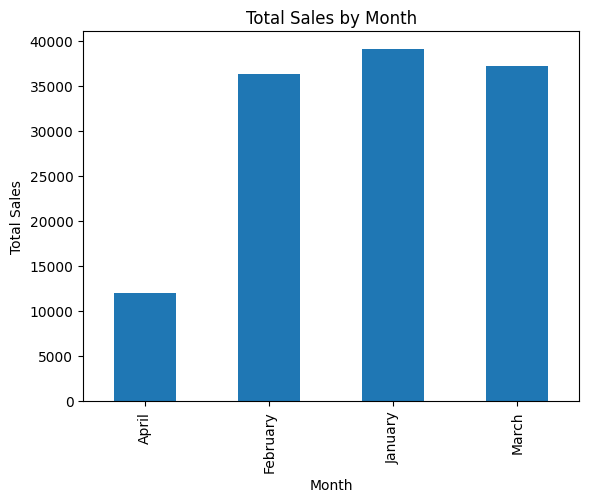

In [53]:
total_sales_by_month.plot(kind = 'bar', title ='Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

To make a Pie Chart

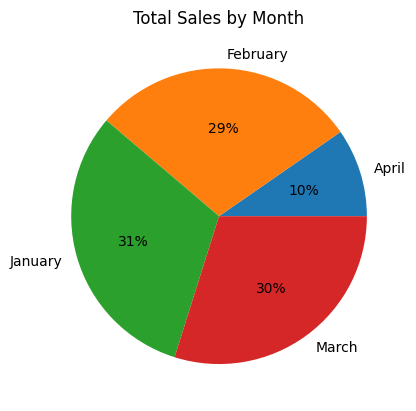

In [54]:
total_sales_by_month.plot(kind = 'pie', title = 'Total Sales by Month', autopct = '%1.0f%%')
plt.xlabel('')
plt.ylabel('')

plt.show()

# Add Quarterly Sales Using the SAME Method

You only need to manually sum the months into quarters and then plot them the same way.

Example

In [55]:
Q1 = df[df['Month'].isin(['January', 'February', 'March'])]['Sales'].sum()
Q2 = df[df['Month'].isin(['April', 'May', 'June'])]['Sales'].sum()
Q3 = df[df['Month'].isin(['July', 'August', 'September'])]['Sales'].sum()
Q4 = df[df['Month'].isin(['October','November', 'December'])]['Sales'].sum()

In [56]:

Quaterly_Sales = pd.Series({

                            'Q1':  Q1,
                            'Q2':  Q2,
                            'Q3':  Q3,
                            'Q4':  Q4
})
Quaterly_Sales


,0
Q1,112613.38
Q2,12028.35
Q3,0.00
Q4,0.00


In [57]:
type(Quaterly_Sales)

pandas.core.series.Series

# ''' Dictionary in Python

A dictionary is just key → value:

my_dict = {
    'name': 'Alice',
    'age': 25
}



'name' and 'age' are keys.

'Alice' and 25 are values.

We use dictionaries as a mapping, nothing special about "columns" here.

2️⃣ Pandas Series

A Series is like a single column table:

index | value
-------------
  ?   |   ?


When you do:

Quarterly_Sales = pd.Series({
    'Q1':  Q1,
    'Q2':  Q2,
    'Q3':  Q3,
    'Q4':  Q4
})


Pandas takes the dictionary keys as the index of the Series.

The dictionary values become the values of the Series.

So conceptually:

index	value
Q1 :	3100,
Q2 :	2800,
Q3 :  2700,
Q4 :  3500

✅ That’s why 'Q1', 'Q2' are the labels on the pie chart — they are literally the index of the Series.

3️⃣ Why we don’t need column names here

A Series is a 1-dimensional structure.

There is no “column name”, just index + value.

In a DataFrame, yes, dictionary keys usually become columns, because a DataFrame is 2-dimensional.

Example:

df = pd.DataFrame({
    'Month': ['Jan', 'Feb'],
    'Sales': [1000, 1200]
})


Here:

Keys 'Month' and 'Sales' → columns

Values → the column data

But in Series, keys → index, values → data

4️⃣ Visual Summary

Dictionary → Series

Dict:       {'Q1':  3100, 'Q2':  2800, 'Q3':  2700, 'Q4':  3500}

Becomes Series:

index   value
Q1      3100
Q2      2800
Q3      2700
Q4      3500


So 'Q1' is not a column, it’s just the index label.

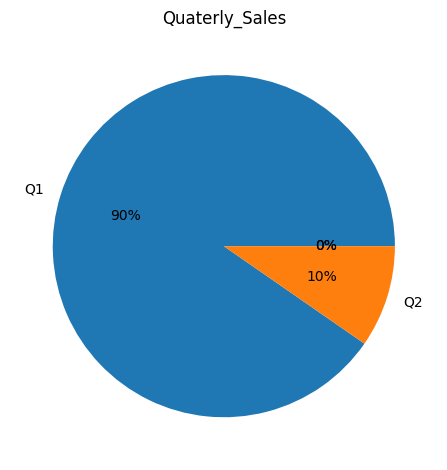

In [58]:
Quaterly_Sales.plot(kind = 'pie', title = 'Quaterly_Sales', autopct = '%1.0f%%')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.show()